In [2]:
import pandas as pd
import numpy as np
data = pd.read_csv('titanic3.csv')

data.replace('?', np.nan, inplace = True)
data = data.astype({"age": np.float64, "fare": np.float64})

<AxesSubplot: xlabel='survived', ylabel='fare'>

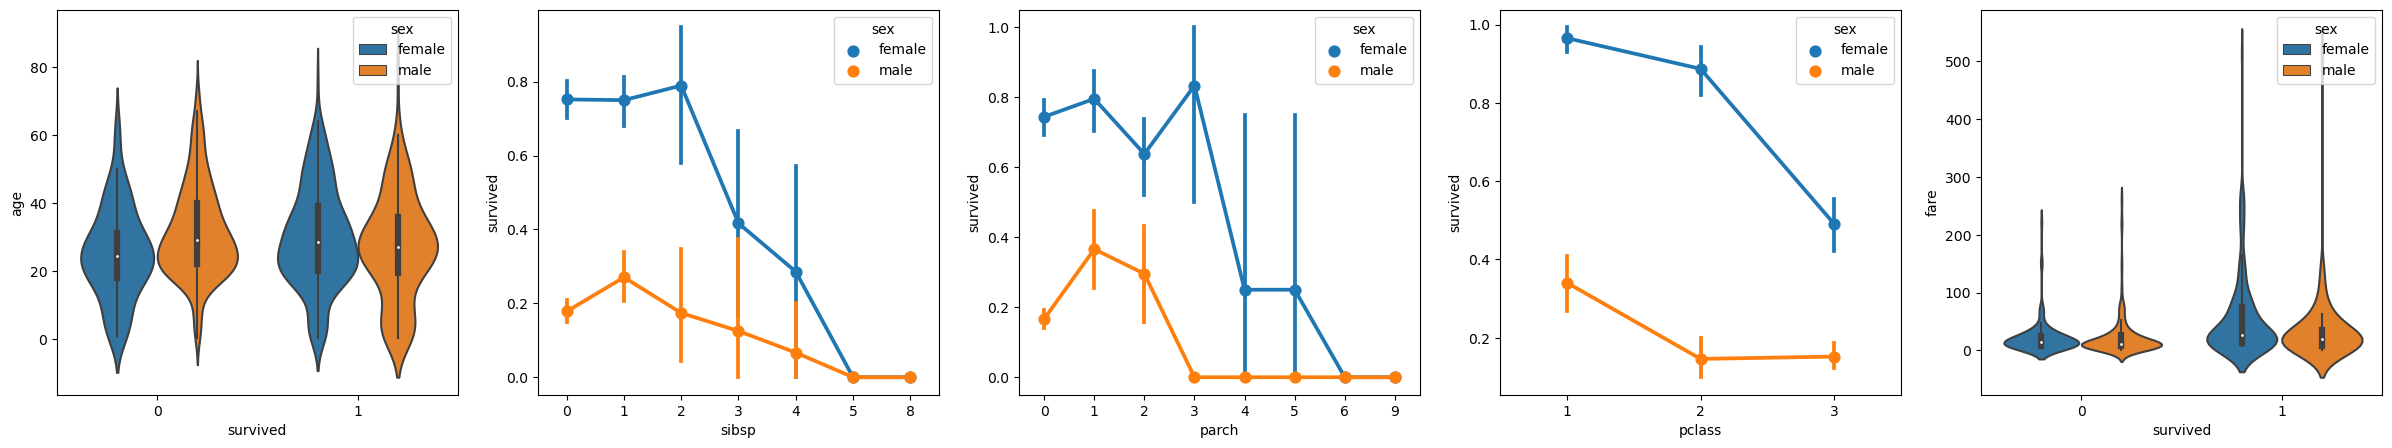

In [3]:
import seaborn as sns 
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])

In [6]:
data.replace({'male': 1, 'female': 0}, inplace=True)
data.corr().abs()[["survived"]]
#Medir a correlação entre os resultado desejado "sobreviventes"
#e os dados disponiveis.

C:\Users\ma_sf\AppData\Local\Temp\ipykernel_19544\827896395.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr().abs()[["survived"]]


,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055512
sibsp,0.027825
parch,0.082660
fare,0.244265
body,NaN


In [9]:
data['relatives'] = data.apply(lambda row: int((row['sibsp'] + row['parch']) > 0), axis=1)
data.corr().abs()[["survived"]]
# criar uma nova coluna no dataset para encontrar a correlação de parentesco
# sibsp = siblings or spouse
# parch = parents or children

C:\Users\ma_sf\AppData\Local\Temp\ipykernel_19544\2529485594.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr().abs()[["survived"]]


,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055512
sibsp,0.027825
parch,0.082660
fare,0.244265
body,NaN
relatives,0.201719


In [16]:
data = data[['sex', 'pclass', 'age', 'relatives', 'fare', 'survived']].dropna()

# train and evaluate a model
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data[['sex', 'pclass', 'age', 'relatives', 'fare']], data.survived, test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

from sklearn import metrics
predict_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, predict_test))
# printar o valor da taxa de sucesso estimada

0.7464114832535885


In [18]:
# Optional: use a neural network
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

# adicionar camadas da rede neural
model.add(Dense(5, kernel_initializer='uniform', activation='relu', input_dim=5))
model.add(Dense(5, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 30        
                                                                 
 dense_1 (Dense)             (None, 5)                 30        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=50)

Epoch 1/50
27/27 [==============================] - 1s 1ms/step - loss: 0.6922 - accuracy: 0.5909
Epoch 2/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6899 - accuracy: 0.5861
Epoch 3/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6863 - accuracy: 0.5861
Epoch 4/50
27/27 [==============================] - 0s 2ms/step - loss: 0.6790 - accuracy: 0.6005
Epoch 5/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6668 - accuracy: 0.7189
Epoch 6/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6481 - accuracy: 0.7560
Epoch 7/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6237 - accuracy: 0.7644
Epoch 8/50
27/27 [==============================] - 0s 1ms/step - loss: 0.5957 - accuracy: 0.7703
Epoch 9/50
27/27 [==============================] - 0s 1ms/step - loss: 0.5672 - accuracy: 0.7727
Epoch 10/50
27/27 [==============================] - 0s 2ms/step - loss: 0.5406 - accuracy: 0.7763
Epoch 11/50
27/27 [

In [20]:
y_pred = np.rint(model.predict(X_test).flatten())
print(metrics.accuracy_score(y_test, y_pred))

7/7 [==============================] - 0s 1ms/step
0.7942583732057417
